In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
%matplotlib qt

In [5]:
def func(x, k):
    return k * x

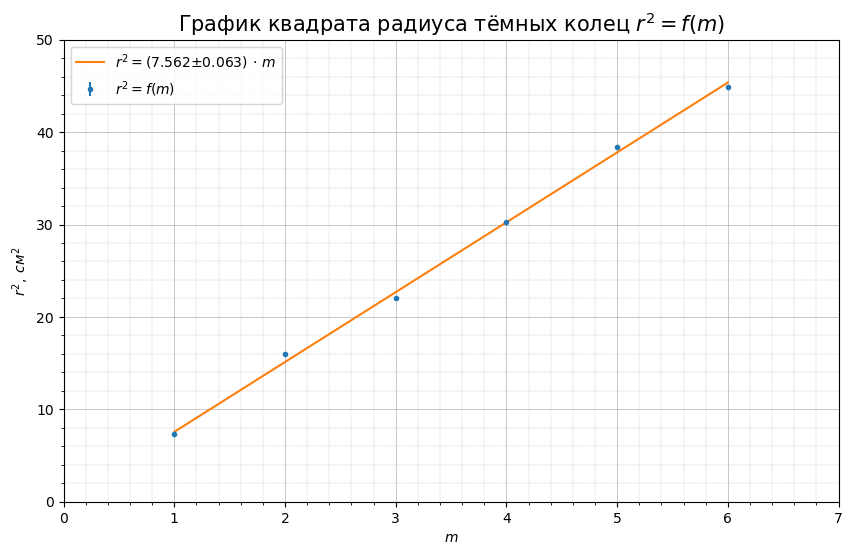

In [10]:
data = pd.read_excel('4.7.2.xlsx', sheet_name='r(m)')
names = list(data)

m = data[names[0]]
r_m = (data[names[1]]) ** 2
dr_m = (data[names[2]]) * np.sqrt(2)

k, cov = curve_fit(func, m, r_m)
r_p = func(m, k)

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

ax.errorbar(m, r_m, yerr=dr_m, label =r"$r^2 = f(m)$", fmt=".")
ax.plot(m, r_p, label=r"$r^2 = $" + r"({:.3f}$\pm${:.3f})".format(k[0], np.sqrt(cov[0][0])) + r"$\,\cdot\, m$")

ax.legend(loc='upper left', fontsize=10)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

ax.axis([0, 7, 0, 50])

ax.set_title(r"График квадрата радиуса тёмных колец $r^2 = f(m)$", loc='center', fontsize=15)
ax.set_xlabel(r"$m$", loc='center', fontsize=10)
ax.set_ylabel(r"$r^2,\; см^2$", loc='center', fontsize=10)

plt.show()

fig.savefig("4.7.2_1.png", dpi=500)